Shalini Sundar
EID: ss222823

Used chatgpt for part 1 and 2


PART ONE

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
dataset_path = "/content/drive/MyDrive/Colab Notebooks/Copy of california_housing.csv"
housing_data = pd.read_csv(dataset_path)

# Get shape and size
num_rows, num_columns = housing_data.shape
total_elements = housing_data.size


# print it
print(f"Dataset Shape: {num_rows} rows, {num_columns} columns")
print(f"Total Data Points: {total_elements}")



Dataset Shape: 20634 rows, 9 columns
Total Data Points: 185706


In [3]:
# Get data types and check for duplicates

column_data_types = housing_data.dtypes
num_duplicate_rows = housing_data.duplicated().sum()  # used chatgpt to get this parameter

print("Column Data Types:\n", column_data_types)
print(f"Number of Duplicate Rows: {num_duplicate_rows}")


Column Data Types:
 MedInc                float64
HouseAge              float64
AveRooms              float64
AveBedrms             float64
Population            float64
AveOccup              float64
Latitude              float64
Longitude             float64
price_above_median      int64
dtype: object
Number of Duplicate Rows: 0


In [5]:
# Get summary statistics
summary = housing_data.describe()
print("Summary Statistics:\n", summary)


print("\nObservation: \n")
print(" Median Income ranges from 0.5 to 15, with a mean of 3.87 (scaled in tens of thousands).")
print(" House Age has a uniform distribution, peaking around 20-30 years.")
print(" Average Rooms has outliers above 20, indicating some extreme values.")
print(" Average Bedrooms has a maximum value of 34.06, which may indicate data anomalies.")
print(" Population is highly skewed, with most blocks having fewer than 5,000 people but extreme values.")
print(" Average Occupancy has extreme outliers above 200.")
print(" Latitude & Longitude align with California’s geography.")
print(" Target variable is balanced (50-50 distribution).")

Summary Statistics:
              MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20634.000000  20634.000000  20634.000000  20634.000000  20634.000000   
mean       3.870795     28.640399      5.429171      1.096628   1425.398081   
std        1.899796     12.584629      2.474393      0.473929   1132.137403   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563925     18.000000      4.440930      1.006067    787.000000   
50%        3.534950     29.000000      5.229190      1.048780   1166.000000   
75%        4.743550     37.000000      6.052381      1.099499   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude  price_above_median  
count  20634.000000  20634.000000  20634.000000        20634.000000  
mean       3.070449     35.631722   -119.569594            0.500000  
std       10.387501      2.135738      2.003457          

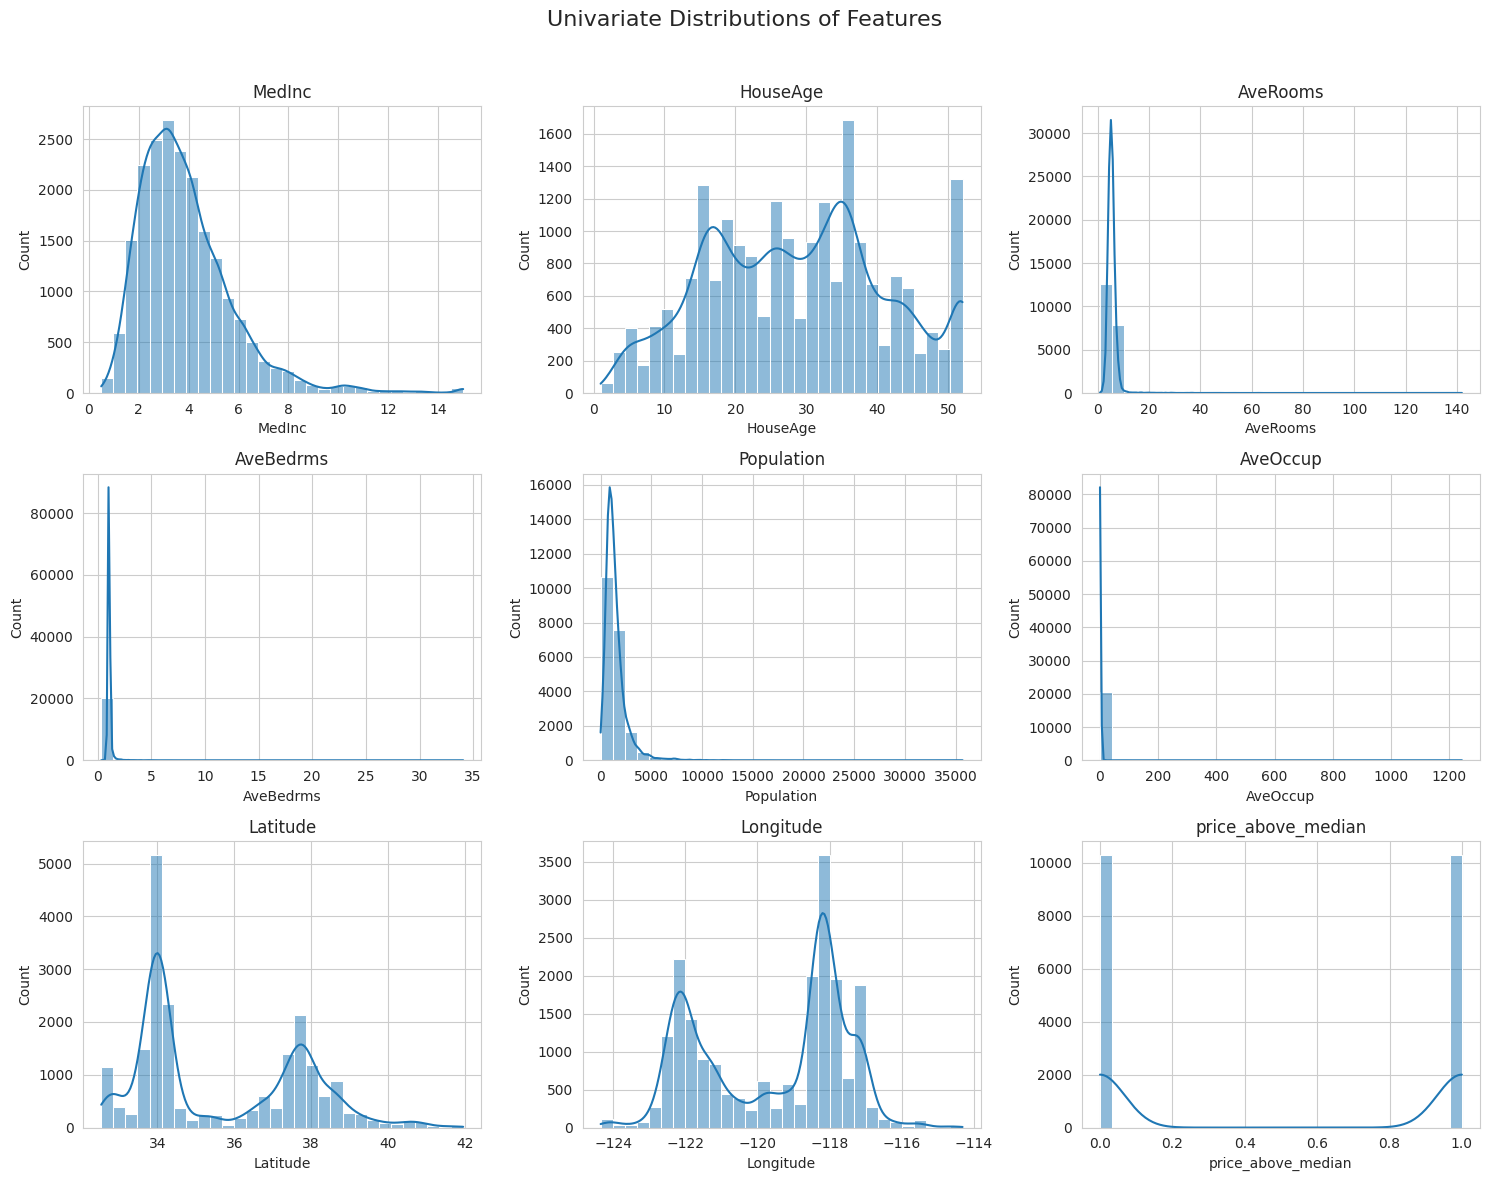


Observations from Univariate Distributions:
 MedInc: Right-skewed, with most values below 6.
 HouseAge: Nearly uniform distribution, with peaks around 20-30 years.
 AveRooms: Right-skewed, with extreme outliers above 20.
 AveBedrms: Similar to AveRooms, with a few extreme values above 10.
 Population: Highly skewed, with most blocks having fewer than 5,000 people but some extreme outliers.
 AveOccup: Right-skewed with massive outliers above 200.
 Latitude & Longitude: Geographically distributed across California.
 price_above_median: Balanced binary distribution (0 and 1).


In [6]:
# style
sns.set_style("whitegrid")

# Create histograms --> numerical var
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
fig.suptitle("Univariate Distributions of Features", fontsize=16)

# Variable list
feature_columns = housing_data.columns

# Used ChatGPT to get this logic --> for loop + how to plot multiple graphs
for index, feature in enumerate(feature_columns):
    row, col_idx = divmod(index, 3)
    sns.histplot(housing_data[feature], bins=30, kde=True, ax=axes[row, col_idx])
    axes[row, col_idx].set_title(feature)


# used chatgpt to help with layouts and the parameters for this line
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


print("\nObservations from Univariate Distributions:")
print(" MedInc: Right-skewed, with most values below 6.")
print(" HouseAge: Nearly uniform distribution, with peaks around 20-30 years.")
print(" AveRooms: Right-skewed, with extreme outliers above 20.")
print(" AveBedrms: Similar to AveRooms, with a few extreme values above 10.")
print(" Population: Highly skewed, with most blocks having fewer than 5,000 people but some extreme outliers.")
print(" AveOccup: Right-skewed with massive outliers above 200.")
print(" Latitude & Longitude: Geographically distributed across California.")
print(" price_above_median: Balanced binary distribution (0 and 1).")


PART TWO


In [7]:
# Split data into features and target

X = housing_data.drop(columns=['price_above_median'])
y = housing_data['price_above_median']

In [8]:
from sklearn.model_selection import train_test_split

# Train-test split
# used chatGPT to help the train/test split --> specfically with the parameters for train_test_split --> used chatgpt to help debug

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [9]:
from sklearn.preprocessing import StandardScaler

# Standardize the dataset

# used chatgpt to see how to standardize data and understand how it affects the dataset

stdScaler = StandardScaler()
X_train = stdScaler.fit_transform(x_train)
X_test = stdScaler.transform(x_test)


In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


# Define models

#used chatgpt to debug this and get specfic numbers for the parameters

models = {
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=50, random_state=42)
}

# Train and evaluate models

#used chatgpt for the confusion matrix and how to make it work/debug _ for loop logic

for a, b in models.items():
    print(f"\n{a} Classifier")
    b.fit(X_train, y_train)
    y_pred = b.predict(X_test)
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))



KNN Classifier
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.81      0.82      2064
           1       0.82      0.83      0.82      2063

    accuracy                           0.82      4127
   macro avg       0.82      0.82      0.82      4127
weighted avg       0.82      0.82      0.82      4127

Confusion Matrix:
 [[1677  387]
 [ 353 1710]]

Decision Tree Classifier
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.83      0.84      2064
           1       0.83      0.85      0.84      2063

    accuracy                           0.84      4127
   macro avg       0.84      0.84      0.84      4127
weighted avg       0.84      0.84      0.84      4127

Confusion Matrix:
 [[1708  356]
 [ 304 1759]]

Random Forest Classifier
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.88      0.89      2064
     